In [1]:
import pandas as pd
file_path = r"D:\PROJECTS\Insurance\insurance.csv"
insurance = pd.read_csv(file_path)
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
#Cheking Dataset

insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
def get_age_segment(age):
    if age <= 12:
        return '0-12 children'
    elif age <= 20:
        return '13-20 teen age'
    elif age <= 30:
        return '21-30 youths'
    elif age <= 45:
        return '31-45 mid-old'
    elif age <= 60:
        return '46-60 old'
    else:
        return '60+ senior citizen'

insurance['age_segment'] = insurance['age'].apply(get_age_segment)
insurance


,age,sex,bmi,children,smoker,region,charges,age_segment
0,19,female,27.900,0,yes,southwest,16884.92400,13-20 teen age
1,18,male,33.770,1,no,southeast,1725.55230,13-20 teen age
2,28,male,33.000,3,no,southeast,4449.46200,21-30 youths
3,33,male,22.705,0,no,northwest,21984.47061,31-45 mid-old
4,32,male,28.880,0,no,northwest,3866.85520,31-45 mid-old
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,46-60 old
1334,18,female,31.920,0,no,northeast,2205.98080,13-20 teen age
1335,18,female,36.850,0,no,southeast,1629.83350,13-20 teen age
1336,21,female,25.800,0,no,southwest,2007.94500,21-30 youths


In [4]:
#check the datset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   age_segment  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


### Insights
**Dataset Structure Overview** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Substantial Sample Size:** The dataset contains 1,338 entries, providing a robust foundation for statistical analysis and reliable insights into insurance patterns.
- **Balanced Data Types:** Contains a mix of numerical (4) and categorical (4) variables, with appropriate data types assigned for effective analysis - integers for age/children, floats for BMI/charges, and objects for categorical fields.
- **Comprehensive Feature Set:** Includes key insurance predictors like demographic factors (age, sex), health indicators (BMI, smoker status), geographic data (region), and dependent variable (charges).
- **Enhanced Segmentation:** The inclusion of 'age_segment' shows thoughtful feature engineering, allowing for more granular age-based analysis beyond the raw age values.

In [5]:
# Check for missing values
print(insurance.isnull().sum())

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
age_segment    0
dtype: int64


### Insights
**Data Quality Check:** Missing Values <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Perfect Data Completeness:** The dataset shows zero missing values across all columns including age, sex, BMI, children, smoker status, region, charges, and age segments.
- **High Data Quality:** This complete dataset requires no imputation or handling of missing values, making it immediately ready for analysis and model building without data cleaning overhead.
- **Reliable Analysis Foundation:** The absence of null values ensures that all statistical analyses and visualizations performed on this dataset are based on complete case analysis.
- **Robust Modeling Potential:** With no missing data, machine learning models can be trained on the entire dataset without compromising on data quality or introducing imputation bias.

In [6]:
# Check unique values in categorical columns
for col in ['sex', 'smoker', 'region']:
    print(f"{col}: {insurance[col].unique()}")

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


### Insights
**Categorical Variables Overview** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Binary Gender Classification:** The dataset contains two gender categories (female/male), allowing for basic gender-based risk analysis but lacking non-binary inclusivity.
- **Clear Smoking Status:** The smoker variable has distinct 'yes'/'no' values, providing a crucial binary risk factor that previous analyses show dramatically impacts insurance charges.
- **Comprehensive Regional Coverage:** Four major US regions are represented (southwest, southeast, northwest, northeast), enabling geographic analysis of cost variations and risk patterns.
- **Well-Structured for Analysis:** All categorical variables have clean, mutually exclusive values without missing categories, making them ready for encoding and inclusion in predictive models.

In [7]:
#Age and Charges
print(insurance[['age', 'charges']].corr())

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


### Insights
**Age and Charges Correlation** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Moderate Positive Correlation:** Age shows a correlation coefficient of 0.299 with medical charges, indicating a noticeable but not overwhelmingly strong relationship between advancing age and increasing healthcare costs.
- **Predictive Value:** While not the strongest predictor alone, age accounts for approximately 9% of the variance in charges (R² ≈ 0.09), making it a statistically significant factor in insurance cost modeling.
- **Consistent with Biological Expectation:** The positive correlation aligns with expected healthcare patterns where older individuals typically require more medical treatment and incur higher costs due to age-related health conditions.
- **Needs Complementary Factors:** The moderate correlation strength suggests that age should be combined with other variables (like smoking status, BMI) in predictive models to accurately estimate insurance charges.

In [8]:
print(insurance.groupby('sex')['charges'].mean())

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


#### Insights
 **sex:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **On average, males pay slightly higher insurance charges than females.**
- **This could indicate higher health risk or lifestyle factors among male policyholders.**

In [9]:
print(insurance.groupby('smoker')['charges'].mean())


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


### Insights
  **Smoker vs Non-Smoker:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **Smokers pay nearly 4 times more in insurance charges than non-smokers.**
- **Smoking is a major risk factor, strongly affecting health insurance costs.**

In [10]:
print(insurance.groupby('region')['charges'].mean())


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


### Insights
  **Region-wise Charges:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **The Southeast region has the highest average insurance charges, while the Southwest and Northwest are the lowest..**
- **Regional variation may reflect differences in healthcare costs, lifestyle, or smoker distribution across regions.**

In [11]:
print(insurance.groupby('children')['charges'].mean())

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


### Insights
  **Charges by Number of Children:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **Charges increase with number of children up to 3 dependents — possibly due to family coverage.**
- **However, charges drop sharply for 5 children, which could be due to small sample size or discounted family plans.** 

In [12]:
insurance.groupby('age_segment')['charges'].mean().round(2)

age_segment
13-20 teen age         8713.48
21-30 youths           9806.03
31-45 mid-old         12647.46
46-60 old             16340.99
60+ senior citizen    21063.16
Name: charges, dtype: float64

### Insights
  **Average Charges by Age Segment:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **Strong positive correlation between age and insurance charges — as age increases, the average charge rises sharply.**
- **Healthcare cost almost doubles from youth to senior citizens.**
- **Insurance providers can use this insight to structure age-based premium plans or risk segmentation.**
- **Preventive healthcare focus should be increased in the mid-age group to control future costs.** 

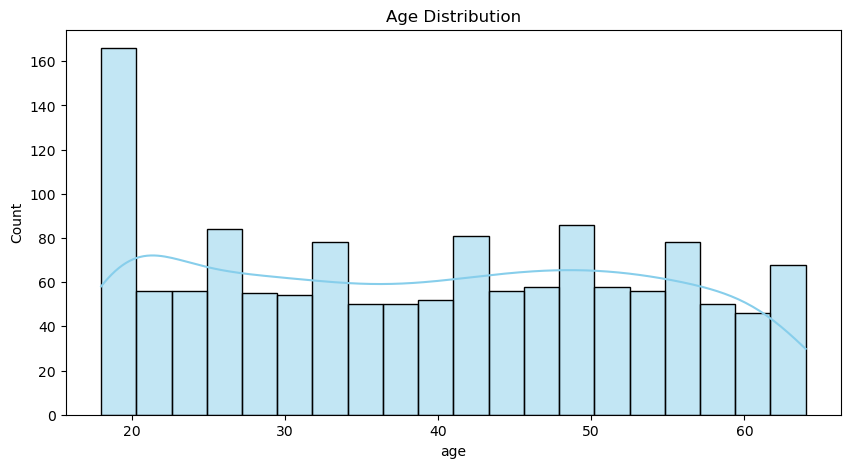

In [29]:
# --- Univariate Analysis ---
plt.figure(figsize=(10, 5))
sns.histplot(insurance['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

### Insights
  **Age Distribution:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **Younger Risk Pool:** The portfolio is heavily concentrated in younger clients (ages 20-30), which typically means a higher volume of lower-premium       policies and lower immediate claims costs for life insurance.
- **Future Risk Concentration:** The steep decline in older age groups indicates a potential protection gap or an opportunity. The insurer has less          exposure to the higher-risk, higher-premium segments (e.g., critical illness, higher-value life insurance) that older demographics require.
- **Strategic Imperative for Growth:** To ensure long-term profitability and growth, the company must focus on client retention and cross-selling as        this young cohort ages, and actively target the under-represented middle-aged market.
- **Pricing and Reserving:** The claims experience will be dominated by the young demographic, which must be carefully factored into pricing models.        However, the insurer must also ensure its reserves are adequate for the long-tail liabilities of the few older policyholders.

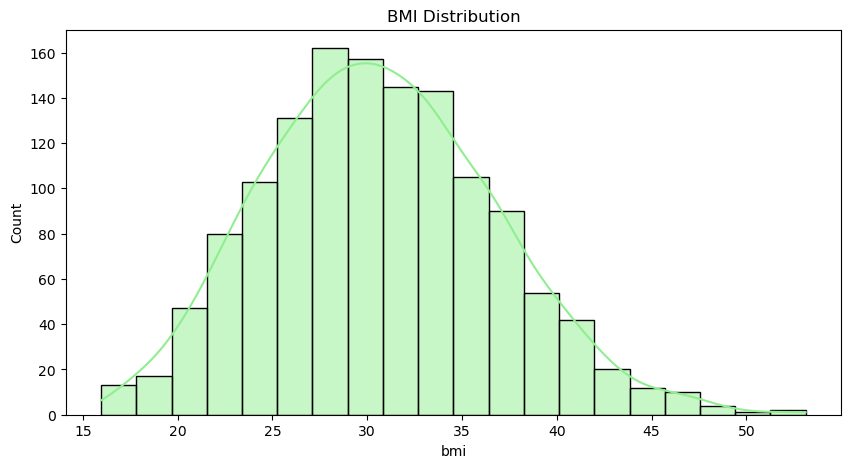

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(insurance['bmi'], bins=20, kde=True, color='lightgreen')
plt.title('BMI Distribution')
plt.show()

### Insights
  **BMI Distribution:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **The data shows a roughly normal distribution centered around the 25-30 BMI range, which borders the "Overweight" category.** 
- **There is a significant portion of the insured population in the "Overweight" (25-30) and "Obese" (30+) categories, indicating higher health risks** 
- **The substantial number of higher-BMI individuals will likely lead to increased claims frequency and severity for weight-related conditions (e.g., diabetes, heart disease).**
- **This distribution highlights a clear need for risk-based pricing and potential wellness programs to mitigate long-term health costs for this portfolio.**

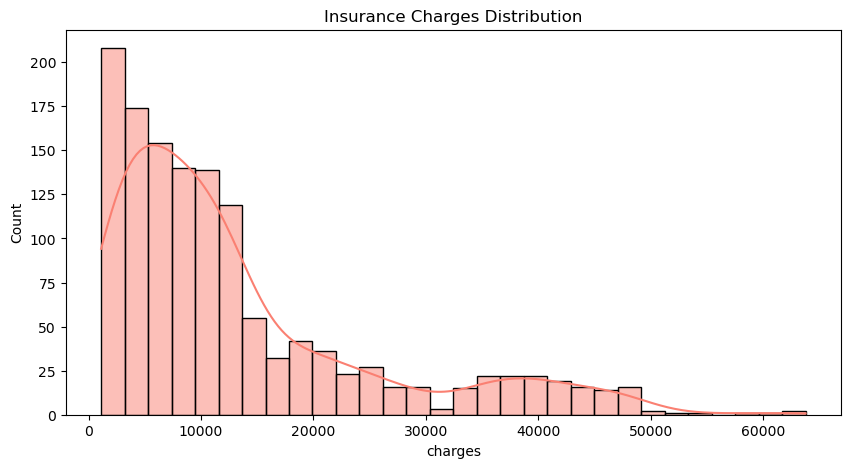

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(insurance['charges'], bins=30, kde=True, color='salmon')
plt.title('Insurance Charges Distribution')
plt.show()




### Insights
  **Insurance charges Distribution:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **The distribution is highly right-skewed, meaning most insurance claims are for relatively low amounts, but a few are extremely high.** 
- **The vast majority of claims (the "body" of the distribution) are clustered below $20,000, representing common, lower-cost medical events.** 
- **A long tail extends to 60,000, indicating a small number of catastrophic or chronic cases that drive a disproportionately large share of the total costs.**
- **This is a classic insurance profile where profitability relies on effectively pricing for the many small claims and ensuring adequate reserves/reinsurance for the few severe ones.**

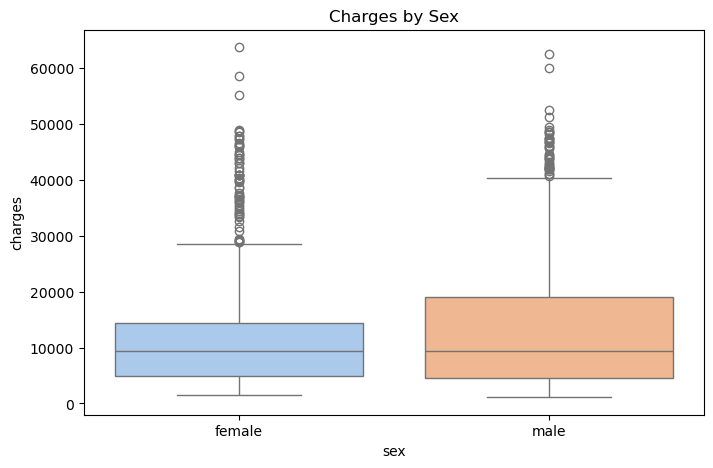

In [43]:
# --- Categorical vs Numerical ---
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='charges', hue='sex',
            data=insurance, palette='pastel', legend=False)
plt.title('Charges by Sex')
plt.show()

### Insights
  **Charges By Sex:** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **No Major Difference in Central Tendency:** The median charges (the line inside the box) are very similar for both males and females, indicating that the typical insurance cost is not significantly different by gender.
- **Males Show Higher Variability and Extreme Costs:** The box for males is taller, and the upper whisker is longer, meaning there is greater spread in the cost data. Most importantly, males have more, and more extreme, outliers representing very high medical charges.
- **Higher 75th Percentile for Males:** The top of the box (the 75th percentile) for males is higher than for females, meaning a larger proportion of men fall into a higher cost bracket.
- **Risk Implication:** While the average cost is similar, the insurance portfolio carries a higher risk of catastrophic claims from male clients, which should be considered in risk modeling and pricing strategies.

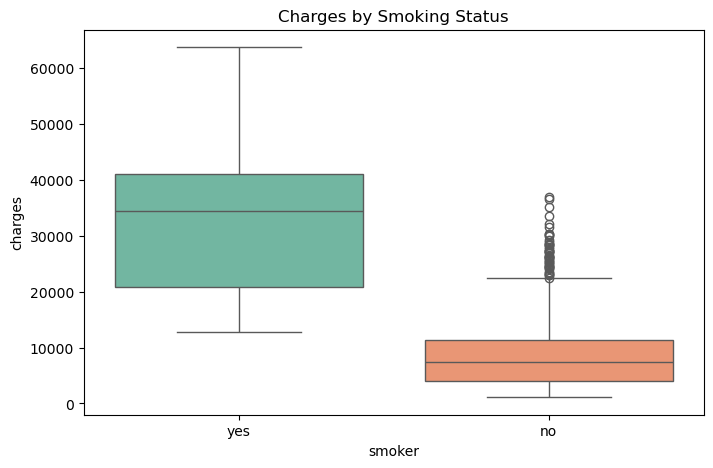

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', hue='smoker',
            data=insurance, palette='Set2', legend=False)
plt.title('Charges by Smoking Status')
plt.show()

### Insights
  **Charges By Smoking Status** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **Extremely Strong Correlation:** Smoking status is a dominant and decisive factor in determining medical charges. The difference in costs between smokers and non-smokers is dramatic.
- **Massive Cost Disparity:** The median charge for smokers is several times higher than the 75th percentile for non-smokers. This indicates that smoking leads to consistently and significantly more expensive healthcare claims.
- **Distinct Risk Profiles:** The two groups form almost completely separate distributions. This is a clear signal for segmented risk pricing, as smokers represent a vastly higher-risk pool.
- **High Variability Among Smokers:** The box for smokers is very tall, showing that even within this high-risk group, there is a wide range of charges, including some extremely high outlier claims.

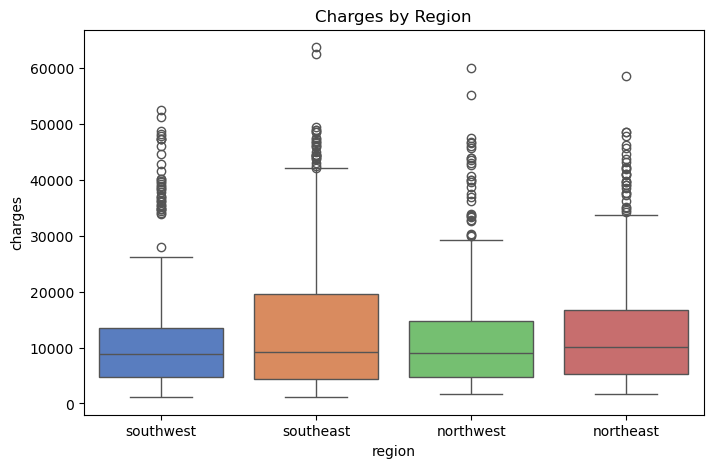

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', hue='region',
            data=insurance, palette='muted', legend=False)
plt.title('Charges by Region')
plt.show()

### Insights
  **Charges By Region** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px"> 
- **Minimal Regional Variation:** The median charges (the line inside the box) are very similar across all four regions, indicating that geographic location alone is not a primary driver of typical insurance costs.
- **Southeast Shows Higher High-End Costs:** The Southeast region has a noticeably higher 75th percentile (top of the box) and more extreme outliers, suggesting a greater frequency of very high-cost claims compared to other regions.
- **Similar Interquartile Ranges:** The size of the boxes (the IQR) is relatively consistent, meaning the spread of the middle 50% of costs is similar everywhere, except for the Southeast's extended upper tail.
- **Weak Predictor:** Unlike smoking or age, region is a much weaker predictor of medical charges. The slight elevation in the Southeast could be due to other hidden factors like higher obesity rates or specific local healthcare costs.

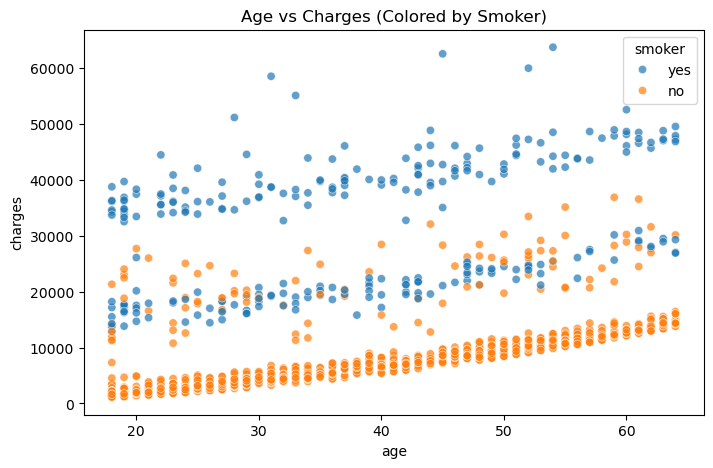

In [42]:
# --- Bivariate Analysis ---
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=insurance, alpha=0.7)
plt.title('Age vs Charges (Colored by Smoker)')
plt.show()

### Insights
**Age vs Charges (by Smoker)** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Clear Positive Correlation:** There is a strong, positive relationship between age and medical charges for both smokers and non-smokers, showing that healthcare costs consistently increase as people get older.
- **Smoking is the Primary Cost Driver:** The plot reveals two distinct bands, with smokers (likely the orange points) forming a top band with significantly higher charges at every age compared to non-smokers (the blue points).
- **Compounding Risk:** The cost difference between smokers and non-smokers widens with age, indicating that the health and financial impacts of smoking compound over time, leading to exponentially higher charges for older smokers.
- **Critical Segmentation Variable:** This visualization confirms that both age and smoking status are critical for accurate risk modeling and pricing, as they together create a clear profile for low-risk and high-risk customer segments.

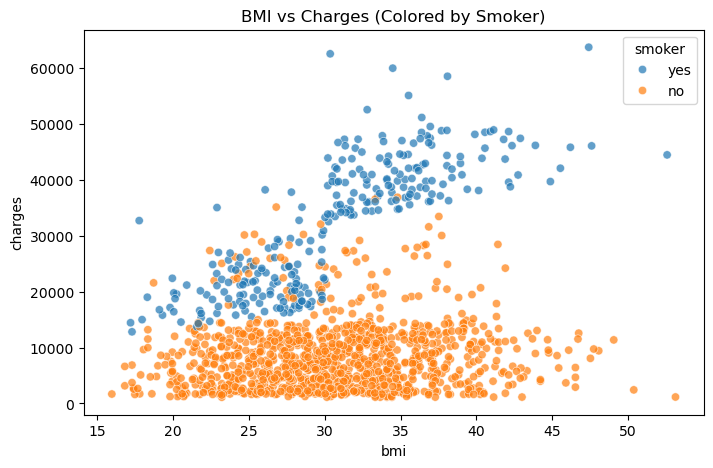

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance, alpha=0.7)
plt.title('BMI vs Charges (Colored by Smoker)')
plt.show()

### Insights
**BMI vs Charges (by Smoker)** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Smoking Dominates Cost Structure:** The plot shows two distinct clusters, confirming that smoking status remains the primary factor determining medical charges, regardless of BMI.
- **BMI Impact Emerges for Smokers:** For smokers (likely the orange points), there appears to be a positive correlation between BMI and charges, suggesting that higher BMI compounds health risks and costs for this group.
- **Non-Smokers Show Limited BMI Impact:** Non-smokers (the blue points) maintain relatively low and stable charges across most BMI levels, indicating BMI alone is not a major cost driver for this segment.
- **Critical Interaction Effect:** The combination of high BMI and smoking creates the highest-risk profile, resulting in the most extreme medical charges, highlighting an important interaction for risk assessment.


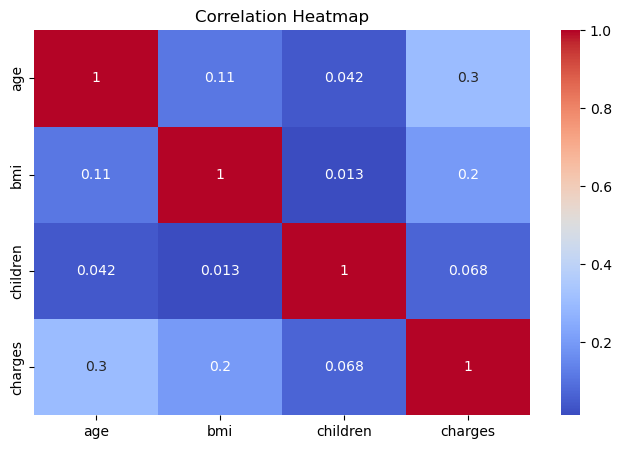

In [37]:
# --- Correlation Analysis ---
plt.figure(figsize=(8,5))
sns.heatmap(insurance.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights
**Correlation Heatmap** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Age Shows Strongest Correlation:** Age has the highest positive correlation with charges (0.3), confirming it as the most influential numerical factor in predicting healthcare costs.
- **BMI Has Moderate Impact:** BMI shows a noticeable but weaker correlation with charges (0.2), indicating it contributes to cost increases but is not a dominant driver alone.
- **Children Count Has Minimal Direct Influence:** The number of children has a very weak correlation with charges (0.068), suggesting it has little direct impact on individual medical costs in this dataset.
- **Missing Strong Predictors:** The relatively low correlation values overall indicate that key cost drivers like smoking status (a categorical variable) and interaction effects are not captured here, explaining why no single numerical feature shows very strong correlation.

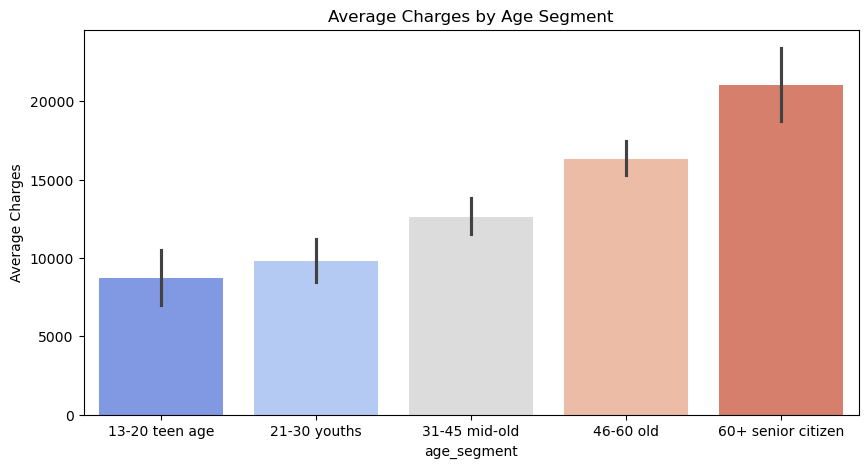

In [24]:
# Visualization: Average Charges by Age Segment
plt.figure(figsize=(10, 5))
sns.barplot(x='age_segment', y='charges', hue='age_segment',
            data=insurance, estimator='mean', palette='coolwarm', legend=False)
plt.title('Average Charges by Age Segment')
plt.ylabel('Average Charges')
plt.show()

### Insights
**Average Charges by Age Segment** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Clear Age-Based Cost Progression:** Medical charges show a consistent, steady increase across age segments, demonstrating that older age groups systematically incur higher healthcare costs.
- **Significant Senior Citizen Costs:** The "senior citizen" segment (60+) has substantially higher average charges than all other groups, reflecting increased healthcare needs and chronic conditions in later life.
- **Moderate Middle-Age Increase:** The "mid-old" (31-45) and "old" (46-60) segments show moderate but noticeable cost increases compared to younger groups, indicating the beginning of age-related health issues.
- **Youthful Advantage:** The "teen" and "youths" segments have the lowest average charges, representing the healthiest and lowest-risk portion of the insured population.

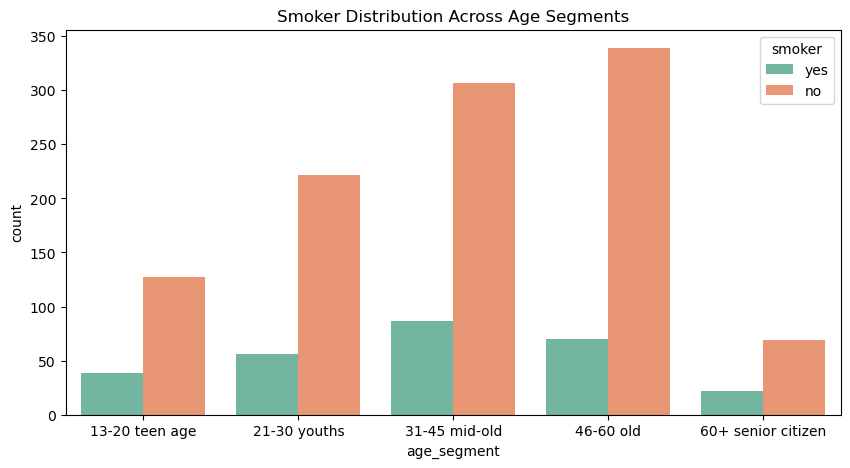

In [25]:
# Visualization: Smoking Distribution by Age Segment
plt.figure(figsize=(10, 5))
sns.countplot(x='age_segment', hue='smoker', data=insurance, palette='Set2')
plt.title('Smoker Distribution Across Age Segments')
plt.show()

### Insights
**Smoker Distribution Across Age Segments** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Youths Show Highest Smoker Count:** The 21-30 age segment contains the largest number of smokers, indicating this demographic represents the highest-risk group for smoking-related claims.
- **Consistent Smoker Proportion:** Most age segments maintain a relatively consistent ratio of smokers to non-smokers, suggesting smoking behavior, once established, persists across age groups.
- **Teen Segment Has Lowest Smoking Prevalence:** The 13-20 age group shows the smallest number of smokers, which is expected given their younger age and potentially shorter exposure to smoking habits.
- **Significant Non-Smoker Base:** All age segments have a substantial majority of non-smokers, highlighting that non-smokers form the core customer base across the entire age spectrum.

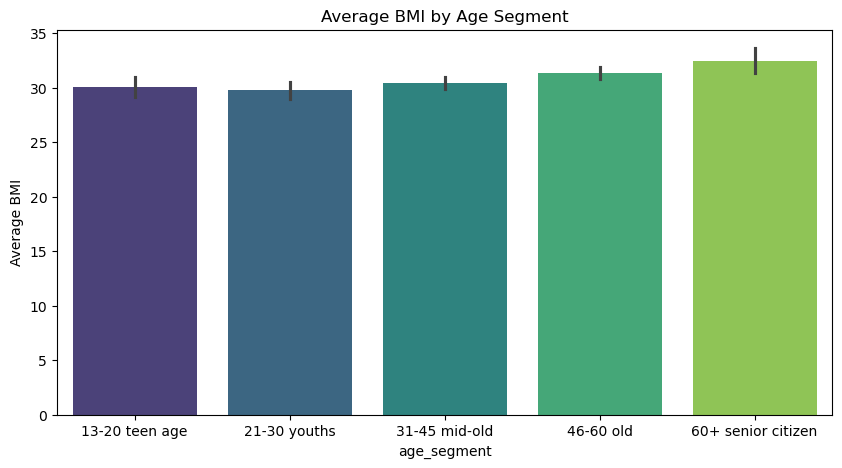

In [27]:
# Visualization: Average BMI by Age Segment
plt.figure(figsize=(10, 5))
sns.barplot(x='age_segment', y='bmi', hue='age_segment',
            data=insurance, estimator='mean', palette='viridis', legend=False)
plt.title('Average BMI by Age Segment')
plt.ylabel('Average BMI')
plt.show()

### Insights
**Average BMI by Age Segment** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Consistent Overweight Range:** All age segments show average BMI values hovering around or above 30, placing the entire insured population in the "obese" category according to standard BMI classifications.
- **Mid-Old Age Shows Peak BMI:** The 31-45 "mid-old" segment exhibits the highest average BMI, suggesting this life stage may present the greatest weight management challenges.
- **Senior Citizen Improvement:** The 60+ "senior citizen" segment shows a slightly lower average BMI compared to middle-aged groups, possibly due to age-related weight loss or health interventions.
- **Universal Weight Management Need:** The consistently high BMI across all segments indicates weight-related health risks are widespread throughout the customer base, not isolated to specific age groups.

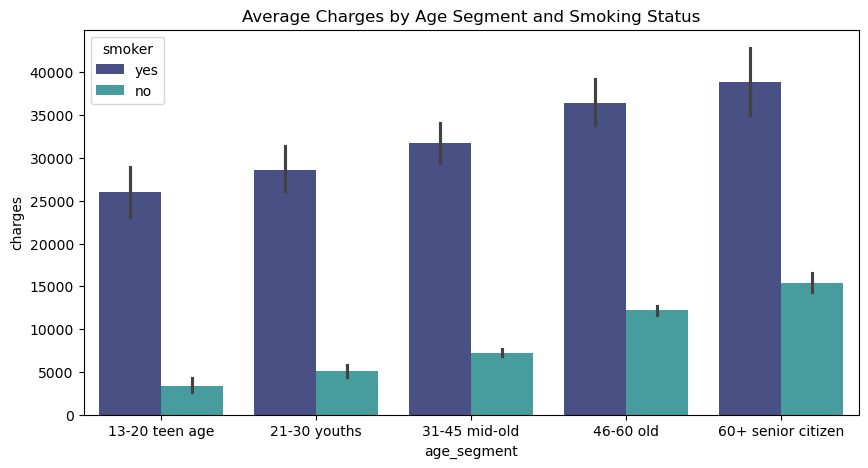

In [28]:
# Optional: Compare charges by both age segment and smoker status
plt.figure(figsize=(10, 5))
sns.barplot(x='age_segment', y='charges', hue='smoker', data=insurance, palette='mako')
plt.title('Average Charges by Age Segment and Smoking Status')
plt.show()

### Insights
**Average Charges by Age Segment and Smoking Status** <div style="background-color:#e8f4fc; padding:15px; border-radius:10px">
- **Smoking Dominates Cost Impact:** Smokers consistently face 3-4 times higher medical charges than non-smokers within every age segment, confirming smoking as the primary cost driver.
- **Age Amplifies Smoking Costs:** The financial impact of smoking compounds with age, with the largest absolute cost difference between smokers and non-smokers appearing in the 60+ senior citizen segment.
- **Progressive Age-Related Increase:** Both smokers and non-smokers show a clear pattern of increasing medical costs with advancing age, though the rate of increase is much steeper for smokers.
- **Youth Smokers vs Senior Non-Smokers:** Young smokers (13-20) incur similar or higher costs than senior non-smokers, demonstrating that smoking behavior can outweigh even the significant cost factor of old age.